<a href="https://colab.research.google.com/github/MdFoysalBhuiyan/ML/blob/main/Ml%20train%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:28:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


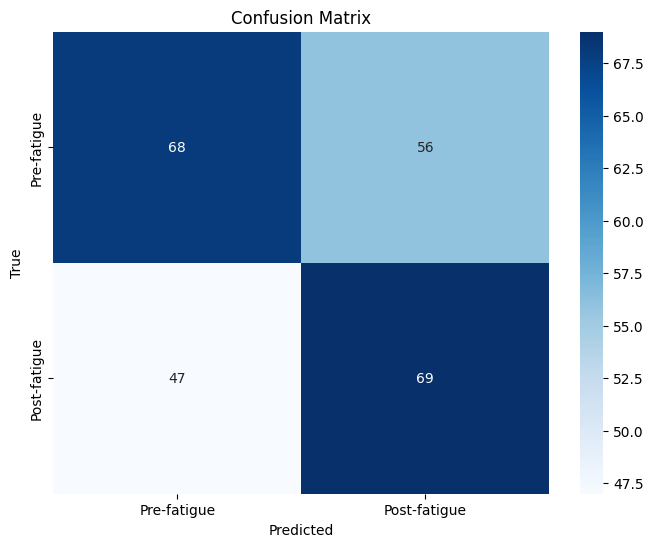

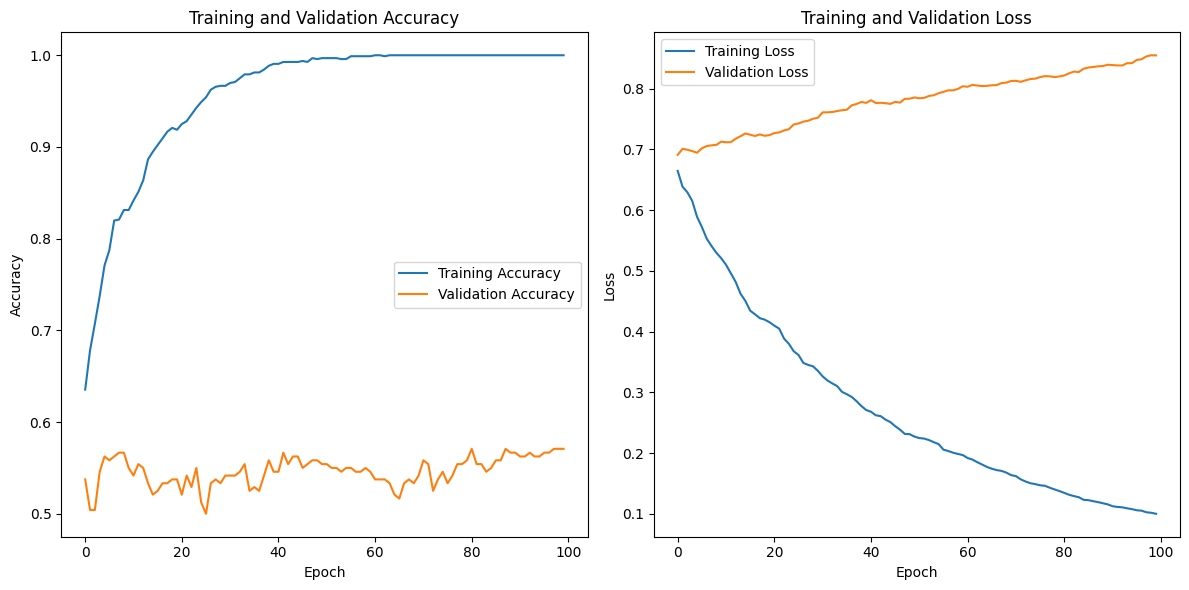

Model Accuracy: 0.5708


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/fatigue_intervention_data.xlsx'
data = pd.read_excel(file_path)

# Step 1: Prepare the features and target variable
X = data.drop(columns=['fatigue_status'])  # Features (excluding the target variable)
y = data['fatigue_status']  # Target variable (0: pre-fatigue, 1: post-fatigue)

# Step 2: Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Feature Selection using PCA (Optional)
pca = PCA(n_components=6)  # Reduce to 6 principal components (max allowed)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Model - XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric=['logloss', 'error'])

# Fit the model and track training history
history = xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Step 6: Predict the results on the test set
y_pred = xgb_model.predict(X_test)

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pre-fatigue', 'Post-fatigue'], yticklabels=['Pre-fatigue', 'Post-fatigue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 9: Plot Training & Validation Accuracy and Loss
results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 6))

# Plot training vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(x_axis, [1 - x for x in results['validation_0']['error']], label='Training Accuracy')
plt.plot(x_axis, [1 - x for x in results['validation_1']['error']], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training vs validation loss
plt.subplot(1, 2, 2)
plt.plot(x_axis, results['validation_0']['logloss'], label='Training Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Evaluate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")